In [1]:
from helper import *

from math import pi
from scipy.integrate import trapz

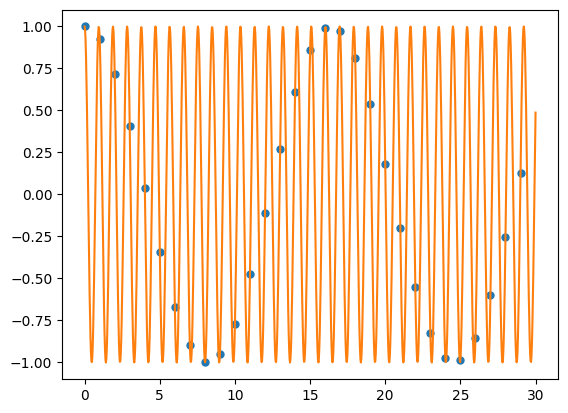

In [61]:
l = 0.3
plt.plot(np.arange(30),np.cos(2*np.arange(30)/l),linewidth=0, marker='.', markersize=10)
plt.plot(np.linspace(0,30,1000),np.cos(2*np.linspace(0,30,1000)/l))


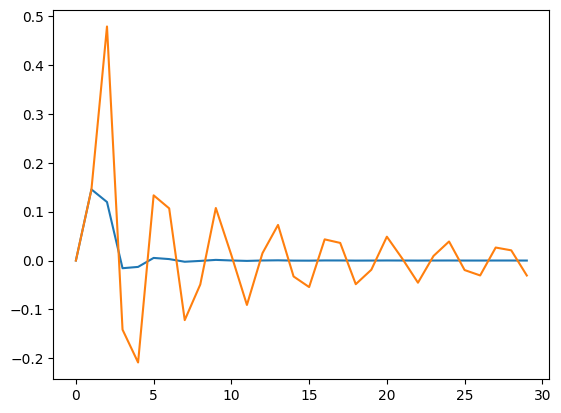

In [23]:
Nr = 30
Nc = 30
N = Nr*Nc

l=0.25

ising = Ising(Nr, Nc, 0, 0, 1, l)
plt.plot(np.arange(Nc), ising.Jij[0,:Nc])
plt.plot(np.arange(Nc), ising.Jij[0,:Nc]*np.arange(Nc)**2)

In [13]:
Nr = 30
Nc = 30
N = Nr*Nc

J2_list = np.array([0.])
l_list = np.array([2.0])
T_list = np.array([15, 12, 10, 8, 6, 5, 4, 3, 2, 1])

h = 0.

Nwarmup = 10*N
Ncycle = 5
Lcycle = 20*N

for l in l_list:
    run_script(Nr, Nc, J2_list, T_list, h, l, Nwarmup, Ncycle, Lcycle, tag='rkky2_configs', meas_config=True, meas_M=False, meas_E=False, meas_S=False, meas_SEm=False)


[15 12 10  8  6  5  4  3  2  1]
Beginning simulation for J2=0.000000, T=15.000000
Warming up
Starting cycles
J2: 0.00, Temp: 15.00, Time: 4.381s
Beginning simulation for J2=0.000000, T=12.000000
Warming up
Starting cycles
J2: 0.00, Temp: 12.00, Time: 4.428s
Beginning simulation for J2=0.000000, T=10.000000
Warming up
Starting cycles
J2: 0.00, Temp: 10.00, Time: 4.445s
Beginning simulation for J2=0.000000, T=8.000000
Warming up
Starting cycles
J2: 0.00, Temp: 8.00, Time: 4.507s
Beginning simulation for J2=0.000000, T=6.000000
Warming up
Starting cycles
J2: 0.00, Temp: 6.00, Time: 4.459s
Beginning simulation for J2=0.000000, T=5.000000
Warming up
Starting cycles
J2: 0.00, Temp: 5.00, Time: 4.491s
Beginning simulation for J2=0.000000, T=4.000000
Warming up
Starting cycles
J2: 0.00, Temp: 4.00, Time: 4.631s
Beginning simulation for J2=0.000000, T=3.000000
Warming up
Starting cycles
J2: 0.00, Temp: 3.00, Time: 4.632s
Beginning simulation for J2=0.000000, T=2.000000
Warming up
Starting cycle

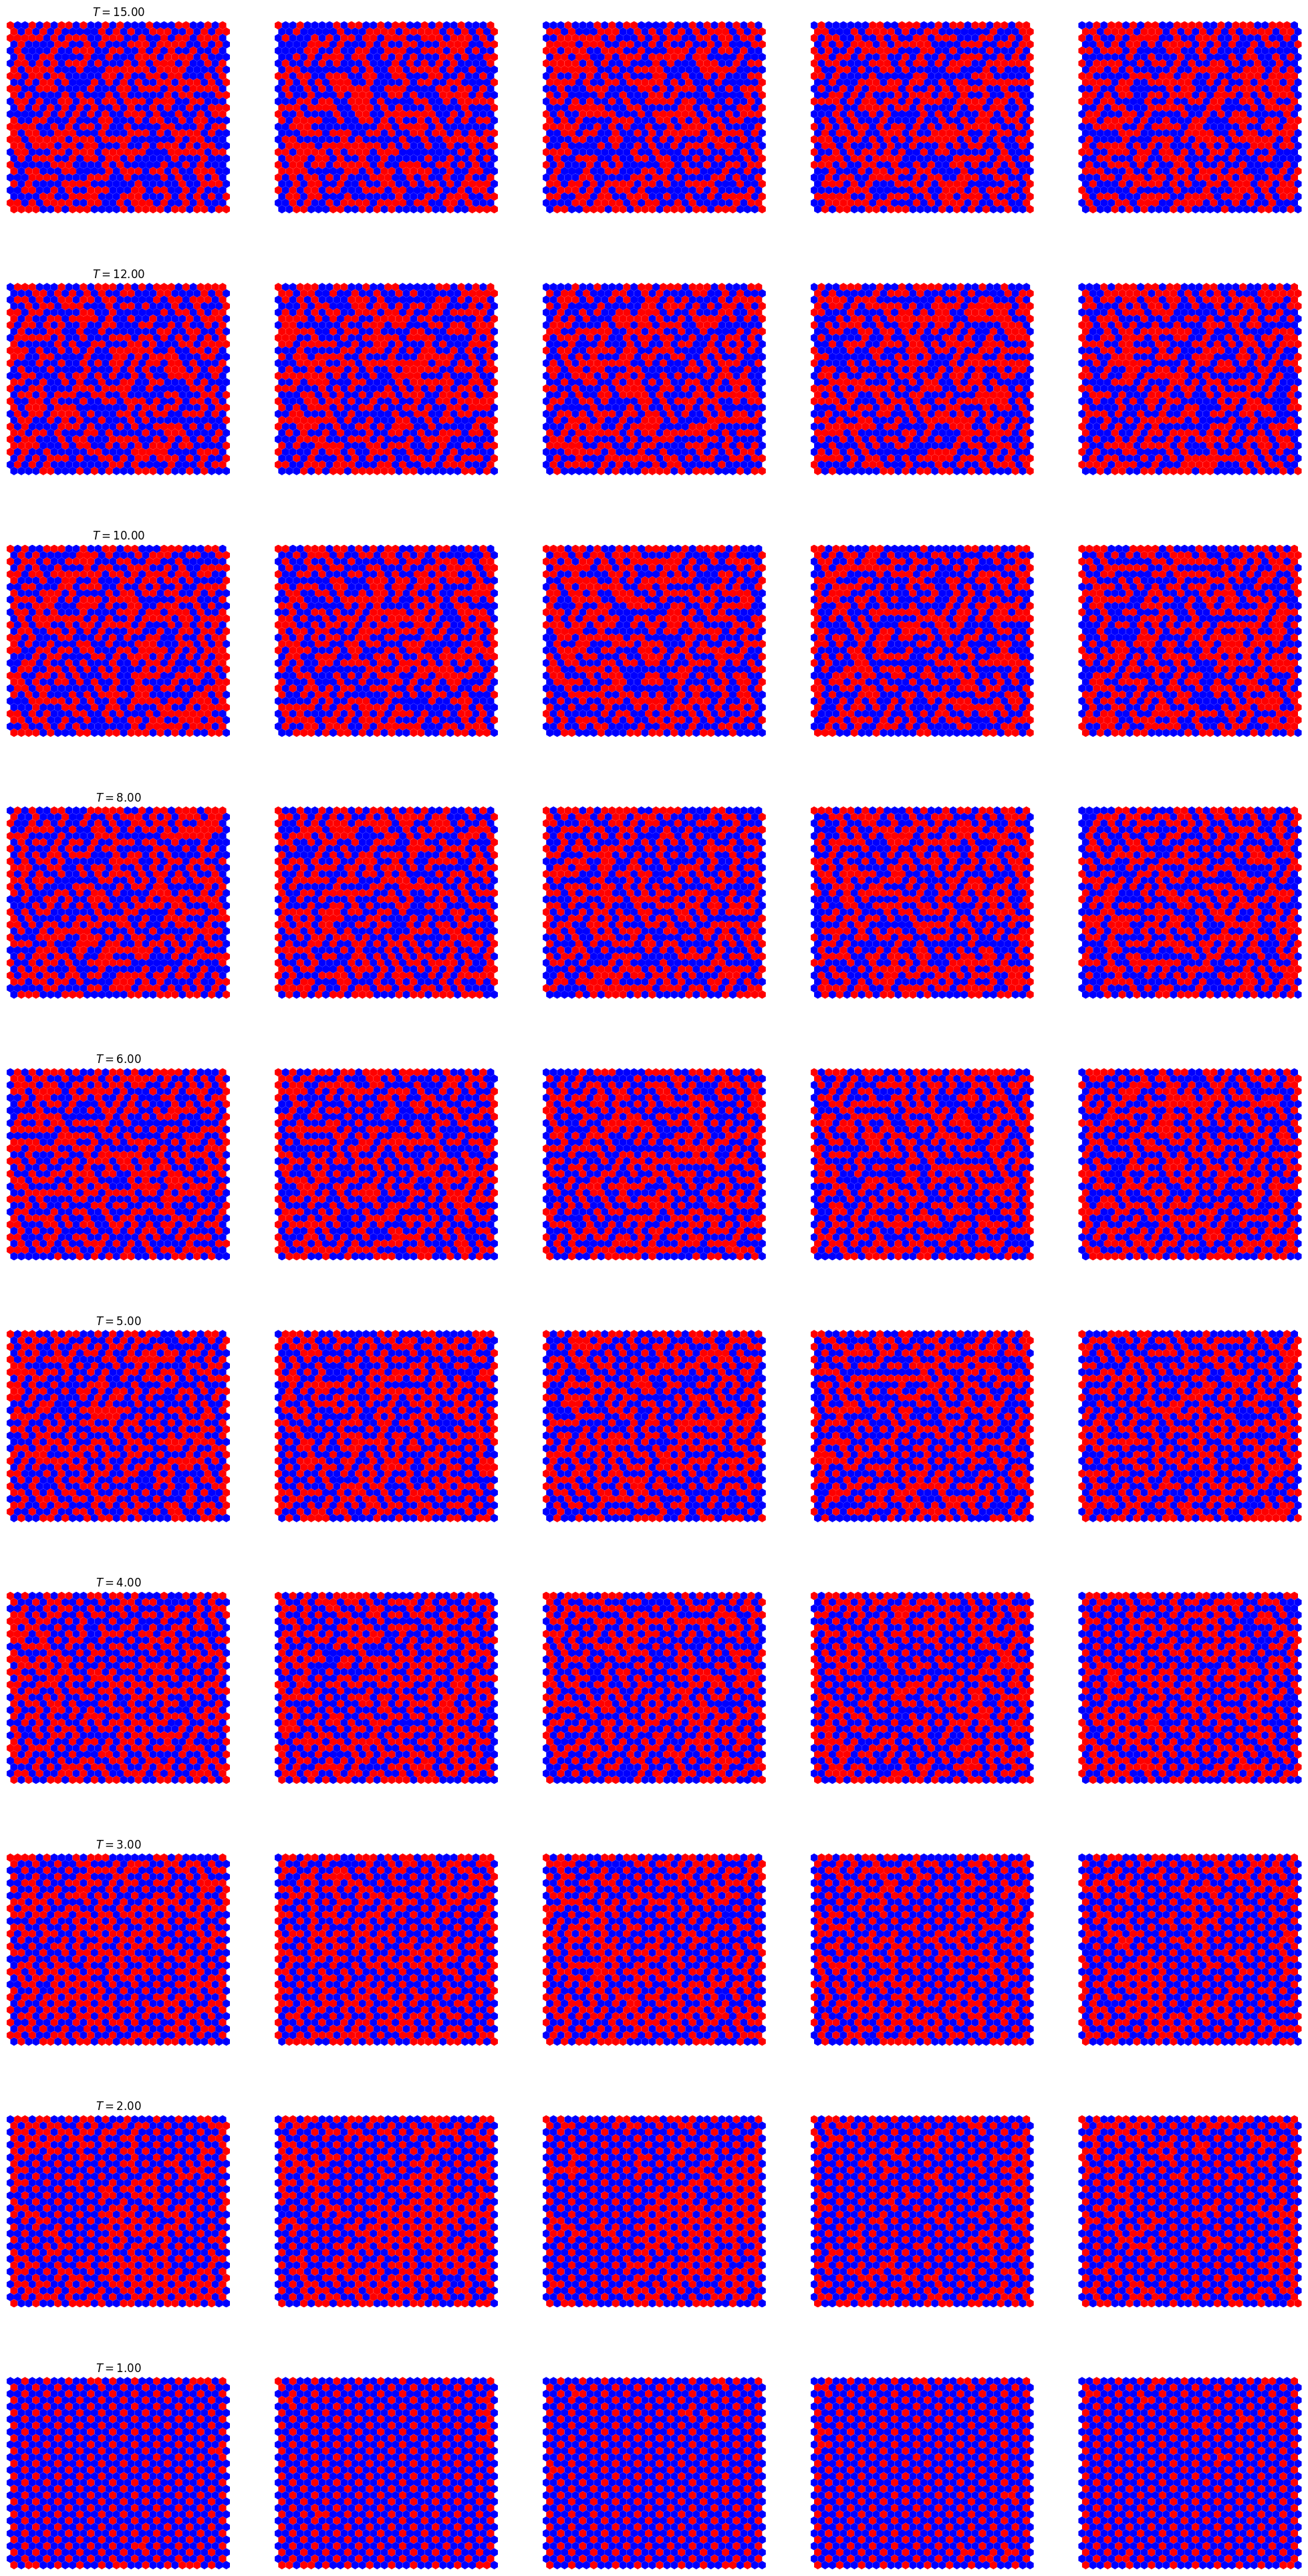

In [15]:
l = 0.5

Nr = 30
Nc = 30
N = Nr*Nc

f = h5py.File('data/rkky2_configs-l%.2f-J20.00-h0.00-N%i.h5'%(l, N), 'r')
T_list = np.array(f['T_list'])
config_array = np.array(f['config_array'])

NT = len(T_list)
NC = len(config_array[0])

fig, ax = plt.subplots(NT, NC, figsize=(5*NC, 5*NT))

for nt in range(NT):
    T = T_list[nt]
    configs = config_array[nt]
    
    
    for n in range(NC):
        triPlot(ax[nt, n], configs[n], Nr, Nc)
        
    ax[nt, 0].set_title('$T=%.2f$'%(T))
    
    
fig.savefig('figures/rkky2_configs_l%.2f.pdf'%(l),dpi=300,bbox_inches="tight")

In [8]:
def triPlotdE(ax, config, configdE, dE, Nr, Nc):

    config = np.reshape(config, (Nr, Nc))
    configdE = np.reshape(configdE, (Nr, Nc))
    
    a = 1 # lattice constant
    r = a/np.sqrt(3)
    x = 0
    y = 0
    stagger = 1
    
    ax.set_aspect('equal')
    
    ax.set_xbound(-a/2, a*Nc)
    ax.set_ybound(a/np.sqrt(3), -a*(Nr*np.sqrt(3)/2-np.sqrt(3)/6))
    ax.set_axis_off()
    
    for nr in range(Nr):
        for nc in range(Nc):
            
            
            if config[nr, nc] > 0:
                color = (1, max(1-abs(configdE[nr, nc]/dE), 0), max(1-abs(configdE[nr, nc]/dE), 0))
            else:
                color = (max(1-abs(configdE[nr, nc]/dE), 0), max(1-abs(configdE[nr, nc]/dE), 0), 1)
            site = RegularPolygon((x, y), numVertices=6, radius=r, orientation=0, facecolor=color)
            ax.add_patch(site)
            
            x += a
        y -= a*np.sqrt(3)/2
        x = stagger*a/2
        stagger = 1 - stagger
        


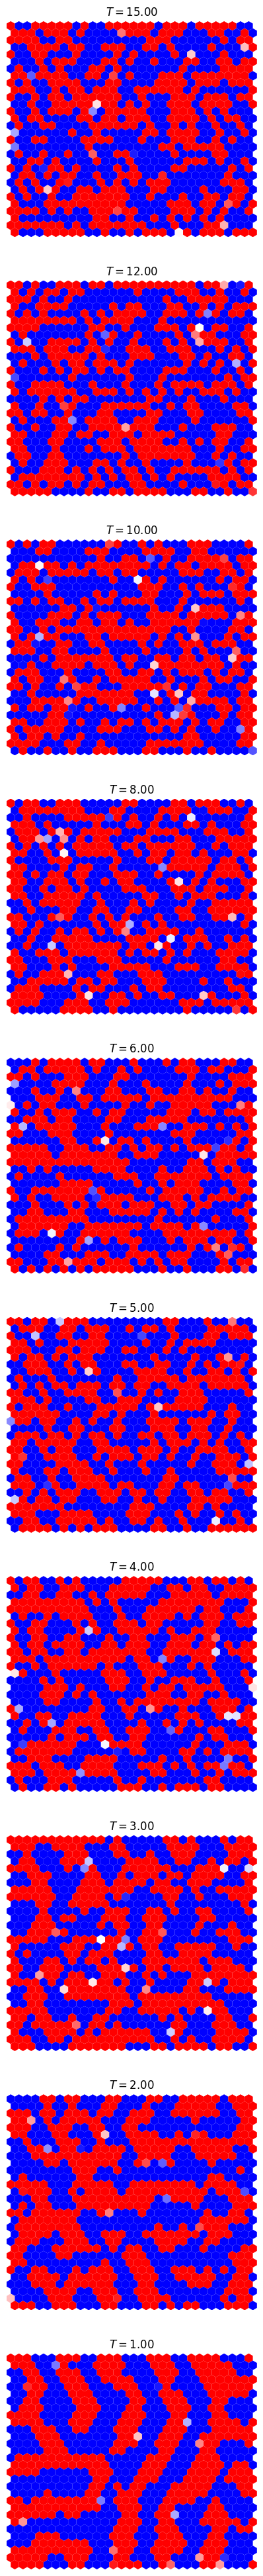

In [15]:
l = 0.90
Nr = 30
Nc = 30
N = Nr*Nc

dE = 0.1

f = h5py.File('data/rkky_configs-l%.2f-J20.00-h0.00-N%i.h5'%(l, N), 'r')
T_list = np.array(f['T_list'])
config_array = np.array(f['config_array'])

NT = len(T_list)
fig, ax = plt.subplots(NT, 1, figsize=(5, 5*NT))

ising = Ising(Nr, Nc, 0, 0, 1, l)

for nt in range(NT):
    T = T_list[nt]
    configs = config_array[nt]
    
    ising.config = configs[0]

    configdE = np.zeros((N), dtype=float)

    for i in range(N):
        configdE[i] = ising.GetFlipdE(i)

    triPlotdE(ax[nt], configs[0], configdE, dE, Nr, Nc)
    
    ax[nt].set_title('$T=%.2f$'%(T))
    
    
# fig.savefig('figures/rkky_configs_l%.2f.pdf'%(l),dpi=300,bbox_inches="tight")